In [2]:
import pandas as pd
import json
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
import sqlite3
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import sqlite3

# Caminho para o banco de dados
db_path = '/Users/leonardooliveira/Desktop/PBI-EXAI/Projeto-BI/preparacao/Experimentai.db'
conn = sqlite3.connect(db_path)

# Leitura das tabelas do banco de dados
df_gosto = pd.read_sql_query("SELECT * FROM dim_gosto_base_nova;", conn)
df_demografico = pd.read_sql_query("SELECT * FROM dim_demografico_base_nova;", conn)
df_cliente_fato = pd.read_sql_query("SELECT * FROM fato_base_nova;", conn)

# Fechar a conexão com o banco de dados
conn.close()

# Fazer o merge usando outer join para incluir todas as linhas
base = pd.merge(df_cliente_fato, df_gosto, on='id_gosto_base', how='inner')
base = pd.merge(base, df_demografico, on='id_demografico_base', how='inner')
base.isnull().sum()


id_fato_base                0
id_demografico_base         0
id_gosto_base               0
data_inscricao              0
rede_social                 0
renda_id                    0
objetivo_id                 0
tem_cupom                   0
assinantes                  0
moda                        0
pessoa_artistica            0
maquiagem                   0
brinquedos_ou_jogos         0
esportes                    0
tem_pet                     0
decorar_casa                0
alimento_saudavel           0
gastronomia                 0
carro                       0
bebida_alcoolica            0
cuidados_pessoais           0
tecnologia                  0
mae_ou_pai                  0
influencer                  0
restricoes_alimentares      0
nome                        0
sobrenome                   0
data_nascimento             6
genero                      0
cidade                      0
estado                      0
bairro                      0
idade                       6
faixa_etar

In [4]:
base.columns

Index(['id_fato_base', 'id_demografico_base', 'id_gosto_base',
       'data_inscricao', 'rede_social', 'renda_id', 'objetivo_id', 'tem_cupom',
       'assinantes', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'nome', 'sobrenome', 'data_nascimento',
       'genero', 'cidade', 'estado', 'bairro', 'idade', 'faixa_etaria'],
      dtype='object')

In [5]:
base.head(5)

,id_fato_base,id_demografico_base,id_gosto_base,data_inscricao,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,...,restricoes_alimentares,nome,sobrenome,data_nascimento,genero,cidade,estado,bairro,idade,faixa_etaria
0,1,1,1,2024-04-29 13:25:00.000 -0300,0,R$16.000 - 24.000,Quero dar a minha opinião sobre produtos,0,0,0,...,Não tenho restrição,Eduarda,Costa,2024-05-12 00:00:00,Feminino,Itaquaquecetuba,São Paulo,Jardim Nossa Senhora DAjuda,0.0,None
1,2,2,2,2024-04-29 13:25:00.000 -0300,0,R$0 - 3.000,Quero dar a minha opinião sobre produtos,0,0,1,...,Não tenho restrição,Olivia,Carvalho,2005-04-23 00:00:00,Feminino,Caraguatatuba,São Paulo,Loteamento Jardim Aruan,19.0,Jovens
2,3,3,3,2024-04-29 13:38:00.000 -0300,1,R$3.000 - 8.000,Quero dar a minha opinião sobre produtos,0,0,1,...,Vegetarianismo,Aline,Marchesotti,1990-03-27 00:00:00,Feminino,Campinas,São Paulo,Vila Costa e Silva,34.0,Adultos
3,4,4,4,2024-04-29 13:45:00.000 -0300,0,R$8.000 - 16.000,Quero dar a minha opinião sobre produtos,0,0,1,...,Não tenho restrição,Amanda,Pinheiro,1985-11-11 00:00:00,Feminino,Guarulhos,São Paulo,Vila Santo Antonio,39.0,Adultos
4,5,5,5,2024-04-29 14:24:00.000 -0300,1,R$3.000 - 8.000,Quero descobrir novos produtos para comprar,0,0,1,...,Não tenho restrição,Fabiana,Gomes B Chaves,1975-11-08 00:00:00,Feminino,São Paulo,São Paulo,Chácara Inglesa,49.0,Adultos


In [286]:
del base['id_fato_base']
del base['data_inscricao']
del base['id_gosto_base']
del base['id_demografico_base']
del base['faixa_etaria']
del base['nome']
del base['sobrenome']


In [287]:
base = base.dropna()

In [288]:
assinantes = base[base['assinantes'] == 1]


In [289]:
assinantes.head()

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
5,0,Superior a R$24.000,Quero dar a minha opinião sobre produtos,0,1,1,0,0,1,1,...,0,0,1,Amendoim,2004-03-30 00:00:00,Feminino,Piracaia,São Paulo,Centro,20.0
425,0,R$0 - 3.000,Quero dar a minha opinião sobre produtos,0,1,1,1,1,1,1,...,1,0,1,Outro,2001-03-19 00:00:00,Feminino,Sao paulo,São Paulo,Santo Amaro,23.0
575,0,R$3.000 - 8.000,Quero descobrir novos produtos para comprar,0,1,1,0,1,1,1,...,0,0,0,,1994-03-09 00:00:00,Feminino,São Paulo,São Paulo,Chácara Califórnia,30.0
621,0,R$8.000 - 16.000,Quero dar a minha opinião sobre produtos,0,1,1,1,1,0,1,...,1,0,1,,1965-09-25 00:00:00,Masculino,Indaiatuba,São Paulo,Jardim Residencial Santa Clara,59.0
675,1,R$0 - 3.000,Quero dar a minha opinião sobre produtos,1,1,1,1,0,1,1,...,1,0,1,,1996-10-19 00:00:00,Feminino,São José dos Campos,São Paulo,Condomínio Royal Park,28.0


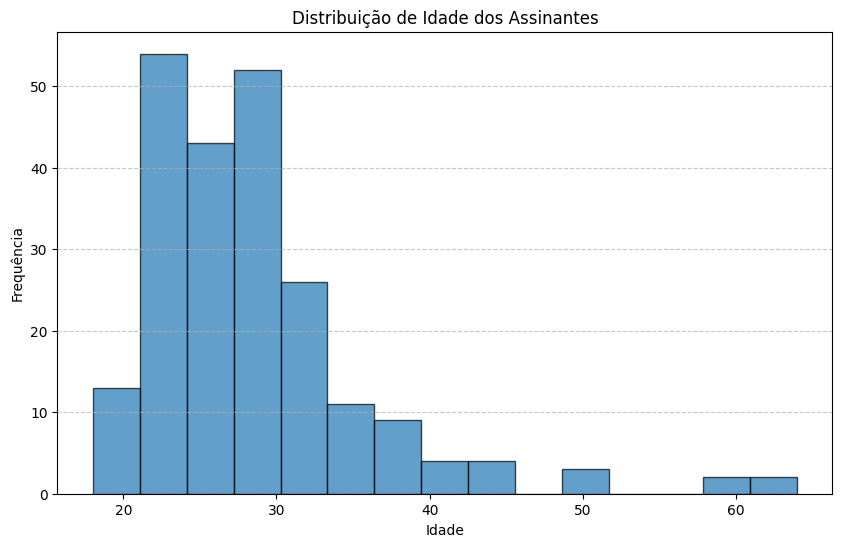

In [290]:
assinantes['idade'].max()
# Criando o gráfico de distribuição
plt.figure(figsize=(10, 6))
plt.hist(assinantes['idade'], bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade dos Assinantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [291]:
assinantes = assinantes[(assinantes['idade'] < 27)]

In [292]:
assinantes['restricoes_alimentares'] = assinantes['restricoes_alimentares'].fillna("Não tenho restrição")

In [293]:
assinantes.isnull().sum()

rede_social               0
renda_id                  0
objetivo_id               0
tem_cupom                 0
assinantes                0
moda                      0
pessoa_artistica          0
maquiagem                 0
brinquedos_ou_jogos       0
esportes                  0
tem_pet                   0
decorar_casa              0
alimento_saudavel         0
gastronomia               0
carro                     0
bebida_alcoolica          0
cuidados_pessoais         0
tecnologia                0
mae_ou_pai                0
influencer                0
restricoes_alimentares    0
data_nascimento           0
genero                    0
cidade                    0
estado                    0
bairro                    0
idade                     0
dtype: int64

In [294]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

para o objetivo, temos 1 para o seguinte objetivo 'Quero dar a minha opinião sobre produtos'
e zero para o seguinte 'Quero descobrir novos produtos para comprar'

para o genero, teremos 1 para feminino e 0 para masculino

In [295]:
assinantes['objetivo_id'] = assinantes['objetivo_id'].apply(lambda x: 1 if x == 'Quero dar a minha opinião sobre produtos' else 0)
assinantes['genero'] = assinantes['genero'].apply(lambda x: 1 if x == 'Feminino' else 0)


In [296]:
assinantes.head(5)

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
5,0,Superior a R$24.000,1,0,1,1,0,0,1,1,...,0,0,1,Amendoim,2004-03-30 00:00:00,1,Piracaia,São Paulo,Centro,20.0
425,0,R$0 - 3.000,1,0,1,1,1,1,1,1,...,1,0,1,Outro,2001-03-19 00:00:00,1,Sao paulo,São Paulo,Santo Amaro,23.0
967,0,R$3.000 - 8.000,1,0,1,1,1,0,1,1,...,1,1,0,,1999-05-18 00:00:00,1,Santo André,São Paulo,-,25.0
1208,0,R$8.000 - 16.000,1,0,1,0,0,1,1,1,...,1,0,0,Não tenho restrição,2006-10-15 00:00:00,1,São Paulo,São Paulo,Vila Ivone,18.0
3037,0,R$0 - 3.000,0,0,1,1,1,1,1,1,...,1,0,0,"Lactose, Glúten",2005-01-19 00:00:00,1,Lages,Santa Catarina,Centro,19.0


Tracar o perfil dos assinantes com base na idade do cliente, isso pode ser que nos ajude a melhorar a precisao
Com base no comportamento dos usuarios (de acordo com a faixa etaria), precisamos ter a possibilidade de sugerir produtos que eles gostem mais
Testar com base na faixa de renda

Fazer o agrupamento hierarquico

apos a analise descritiva dos clusters, fazer queries usando alguns pontos de mais importancia dentro de cada cluster, (logica de query if x, y or x, y, z)


In [297]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

In [298]:
features = assinantes[[
'esportes',
'tecnologia',
'cuidados_pessoais',
'gastronomia',
'brinquedos_ou_jogos',
'maquiagem',
'renda_id',
'genero',
'idade',
'moda',
'alimento_saudavel'
]]

In [299]:
features = pd.get_dummies(features, columns=[
'esportes',
'tecnologia',
'cuidados_pessoais',
'gastronomia',
'brinquedos_ou_jogos',
'maquiagem',
'renda_id',
'genero',
'moda',
'alimento_saudavel',
], drop_first=True)

In [300]:
features['idade'] = stats.zscore(features['idade'])

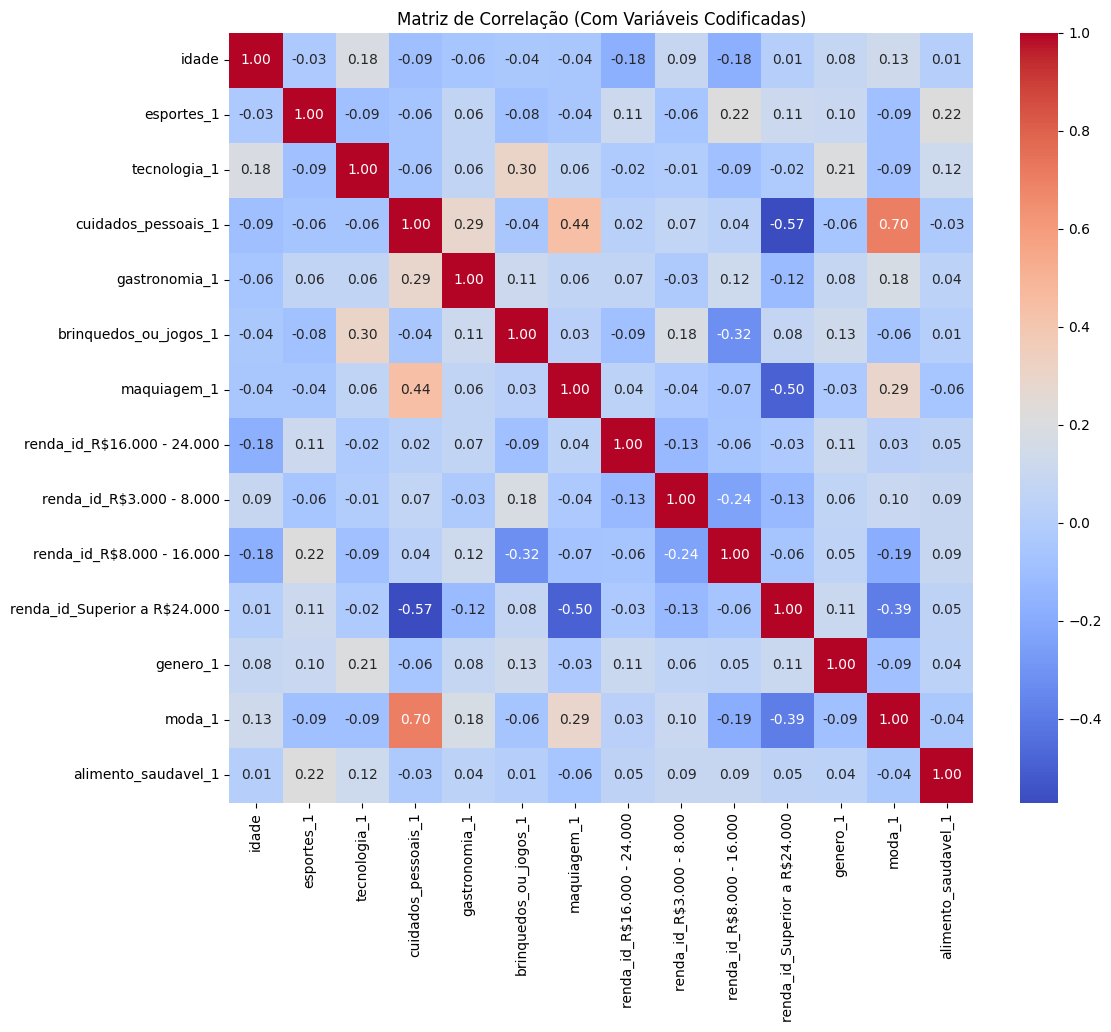

In [301]:
# Calcular a matriz de correlação
correlation_matrix = features.corr()

# Visualizar como heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Com Variáveis Codificadas)")
plt.show()


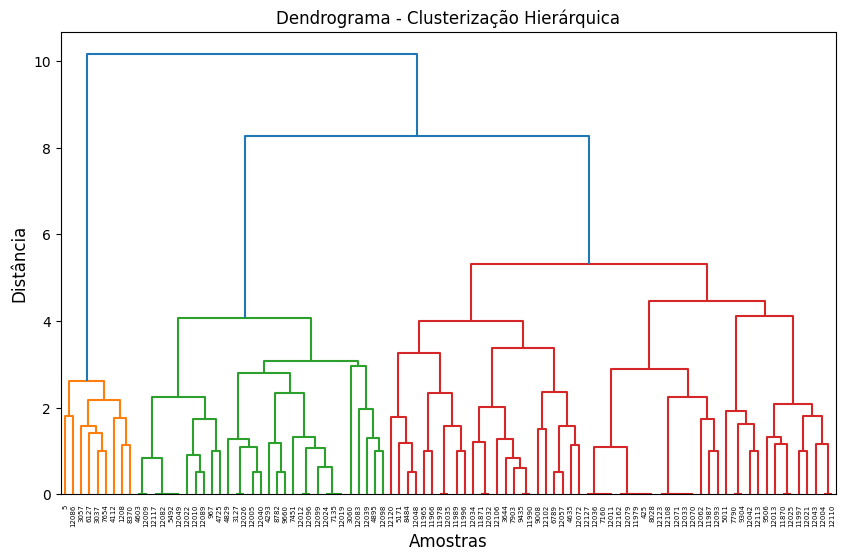

In [302]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(features, method='ward', metric='euclidean'),
    orientation='top',  # Altere para 'left', 'right', 'top' ou 'bottom'
    labels=list(features.index) if hasattr(features, 'index') else None
)
plt.title('Dendrograma - Clusterização Hierárquica', fontsize=12)
plt.xlabel('Amostras', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.axhline(y=15, color='red', linestyle='--')  # Defina o corte desejado
plt.show()

In [303]:
from sklearn.cluster import AgglomerativeClustering

# Ajustar o modelo de clusterização hierárquica
clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Obter os rótulos dos clusters
assinantes['cluster'] = clusters.fit_predict(features)


In [304]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade',
       'cluster'],
      dtype='object')

In [305]:
assinantes.head(5)

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade,cluster
5,0,Superior a R$24.000,1,0,1,1,0,0,1,1,...,0,1,Amendoim,2004-03-30 00:00:00,1,Piracaia,São Paulo,Centro,20.0,1
425,0,R$0 - 3.000,1,0,1,1,1,1,1,1,...,0,1,Outro,2001-03-19 00:00:00,1,Sao paulo,São Paulo,Santo Amaro,23.0,0
967,0,R$3.000 - 8.000,1,0,1,1,1,0,1,1,...,1,0,,1999-05-18 00:00:00,1,Santo André,São Paulo,-,25.0,0
1208,0,R$8.000 - 16.000,1,0,1,0,0,1,1,1,...,0,0,Não tenho restrição,2006-10-15 00:00:00,1,São Paulo,São Paulo,Vila Ivone,18.0,1
3037,0,R$0 - 3.000,0,0,1,1,1,1,1,1,...,0,0,"Lactose, Glúten",2005-01-19 00:00:00,1,Lages,Santa Catarina,Centro,19.0,1


In [306]:
cluster1 = assinantes[assinantes['cluster'] == 0]
cluster2 = assinantes[assinantes['cluster'] == 1]

In [307]:
cluster1.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade',
       'cluster'],
      dtype='object')

In [308]:
cluster1.head(4)

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade,cluster
425,0,R$0 - 3.000,1,0,1,1,1,1,1,1,...,0,1,Outro,2001-03-19 00:00:00,1,Sao paulo,São Paulo,Santo Amaro,23.0,0
967,0,R$3.000 - 8.000,1,0,1,1,1,0,1,1,...,1,0,,1999-05-18 00:00:00,1,Santo André,São Paulo,-,25.0,0
3060,0,Superior a R$24.000,0,0,1,0,0,0,1,1,...,0,0,Não tenho restrição,1999-06-01 00:00:00,1,São Paulo,São Paulo,Vila Madalena,25.0,0
3127,0,R$0 - 3.000,1,0,1,1,1,1,1,0,...,0,0,,1998-09-13 00:00:00,1,Itacoatiara,Amazonas,São Cristóvão,26.0,0


In [309]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ajustar o modelo hierárquico
linkage_matrix = linkage(features, method='ward')

for n_clusters in range(2, 10):
    # Ajustar o modelo cortando em n_clusters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglomerative.fit_predict(features)
    
    # Calcular o silhouette score
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")



For n_clusters = 2, the silhouette score is 0.37140740813446516
For n_clusters = 3, the silhouette score is 0.2008283287444822
For n_clusters = 4, the silhouette score is 0.19027107547715835
For n_clusters = 5, the silhouette score is 0.17888696925690845
For n_clusters = 6, the silhouette score is 0.19186042420815802
For n_clusters = 7, the silhouette score is 0.18622164233500668
For n_clusters = 8, the silhouette score is 0.2085815337867008
For n_clusters = 9, the silhouette score is 0.21240660754344168


Variância Explicada: [0.12557746 0.11421166]


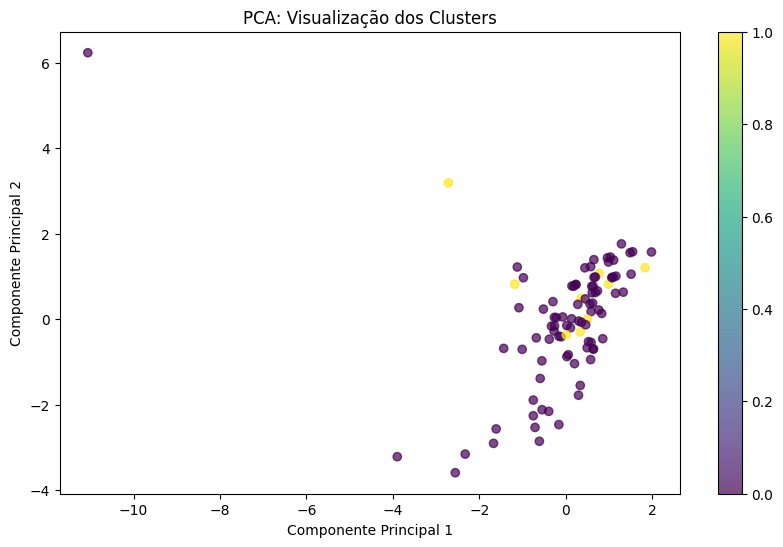

Contribuição das Variáveis para os Componentes Principais:
      rede_social     tem_cupom      moda  pessoa_artistica  maquiagem  \
PCA1     0.099607  0.000000e+00  0.446792          0.209571   0.380384   
PCA2     0.141010 -5.551115e-17 -0.335861         -0.010874  -0.137868   

      brinquedos_ou_jogos  esportes   tem_pet  decorar_casa  \
PCA1             0.183816  0.003865 -0.005877      0.229541   
PCA2             0.346713  0.180929  0.007668      0.352978   

      alimento_saudavel  gastronomia     carro  bebida_alcoolica  \
PCA1           0.038735     0.333450  0.166960          0.209245   
PCA2           0.202292     0.074088  0.232898          0.168592   

      cuidados_pessoais  tecnologia  mae_ou_pai  influencer    genero  \
PCA1           0.504521    0.126823    0.051098    0.215867  0.087969   
PCA2          -0.312536    0.375941   -0.171865    0.095374  0.404228   

         idade  
PCA1 -0.058264  
PCA2 -0.021673  


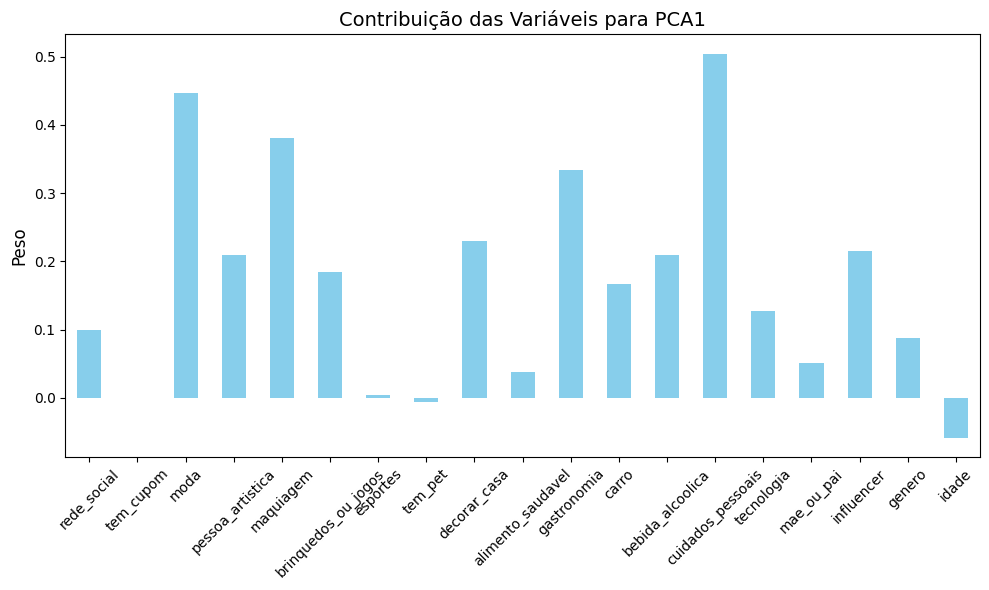

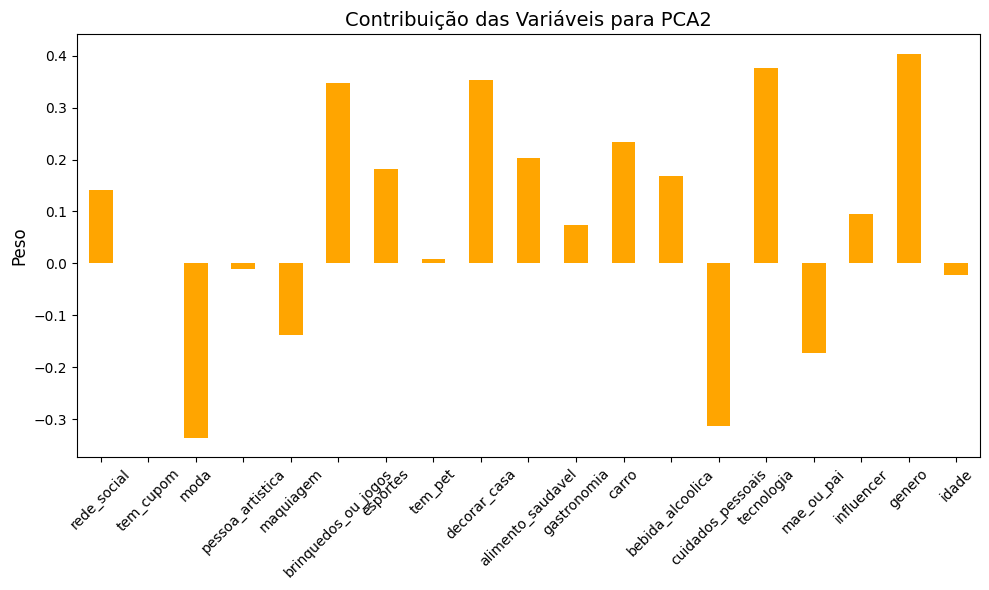

In [310]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecionar apenas as colunas numéricas presentes no DataFrame
numeric_columns = [
    'rede_social', 'tem_cupom', 
    'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
    'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
    'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
    'tecnologia', 'mae_ou_pai', 'influencer', 'genero', 'idade'
]

# Verificar se as colunas existem no DataFrame
numeric_columns = [col for col in numeric_columns if col in assinantes.columns]

# Criar um DataFrame apenas com as colunas numéricas existentes
pca_data = assinantes[numeric_columns].copy()


# Certificar-se de que todas as colunas são numéricas
for col in pca_data.columns:
    if pca_data[col].dtype == 'object':
        # Aplicar codificação (ex.: one-hot encoding ou mapeamento manual)
        pca_data[col] = pd.factorize(pca_data[col])[0]

# Normalizar os dados antes do PCA
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Criar o modelo PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
pca_result = pca.fit_transform(pca_data_scaled)

# Adicionar os componentes principais ao DataFrame original
assinantes['PCA1'] = pca_result[:, 0]
assinantes['PCA2'] = pca_result[:, 1]

# Visualizar a variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância Explicada: {explained_variance}")

# Criar um scatter plot para visualizar os clusters com os componentes principais
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(assinantes['PCA1'], assinantes['PCA2'], c=assinantes['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA: Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
# Obter os loadings (pesos das variáveis para cada componente)
loadings = pd.DataFrame(pca.components_, columns=numeric_columns, index=['PCA1', 'PCA2'])

# Exibir a contribuição das variáveis para os componentes
print("Contribuição das Variáveis para os Componentes Principais:")
print(loadings)

# Visualizar os loadings como um gráfico
plt.figure(figsize=(10, 6))
loadings.loc['PCA1'].plot(kind='bar', color='skyblue')
plt.title('Contribuição das Variáveis para PCA1', fontsize=14)
plt.ylabel('Peso', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
loadings.loc['PCA2'].plot(kind='bar', color='orange')
plt.title('Contribuição das Variáveis para PCA2', fontsize=14)
plt.ylabel('Peso', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [311]:
# import matplotlib.pyplot as plt

# # Função para criar gráficos de pizza com porcentagem
# def plot_pie(data, column):
#     plt.figure(figsize=(8, 8))
#     data[column].value_counts().plot(
#         kind='pie',
#         autopct='%1.1f%%',
#         startangle=90,
#         colors=plt.cm.Paired.colors
#     )
#     plt.title(f'Distribuição de {column}', fontsize=14)
#     plt.ylabel('')  # Remover o rótulo do eixo y
#     plt.tight_layout()
#     plt.show()



# # Criar gráficos de pizza para as colunas restantes
# for column in columns_to_plot_pie:
#     if column in cluster1.columns:
#         plot_pie(cluster1, column)


In [312]:
# import matplotlib.pyplot as plt

# # Função para criar gráficos de pizza com porcentagem
# def plot_pie(data, column):
#     plt.figure(figsize=(8, 8))
#     data[column].value_counts().plot(
#         kind='pie',
#         autopct='%1.1f%%',
#         startangle=90,
#         colors=plt.cm.Paired.colors
#     )
#     plt.title(f'Distribuição de {column}', fontsize=14)
#     plt.ylabel('')  # Remover o rótulo do eixo y
#     plt.tight_layout()
#     plt.show()

# # Lista de colunas para plotar, excluindo 'idade' e 'faixa_renda'
# columns_to_exclude = ['idade', 'faixa_renda']
# columns_to_plot_pie = [col for col in columns_to_plot if col not in columns_to_exclude]

# # Criar gráficos de pizza para as colunas restantes
# for column in columns_to_plot_pie:
#     if column in cluster2.columns:
#         plot_pie(cluster2, column)
